In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [65]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [66]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104143 entries, 0 to 1104142
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1104143 non-null  int64  
 1   kWh       1104143 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.8 MB


In [67]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1104138    0.13
1104139    0.14
1104140    0.13
1104141    0.13
1104142    0.13
Name: kWh, Length: 1104143, dtype: float64

In [68]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1104138    0.13
1104139    0.14
1104140    0.13
1104141    0.13
1104142    0.13
Name: kWh, Length: 1104143, dtype: float64

In [69]:
l=len(conso_data)-1
l

1104142

In [70]:
conso_data['sec']=conso_data['Interval']/1000


In [71]:
conso_data['Wh']=3600000/conso_data['Interval']


In [72]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [73]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104143 entries, 0 to 1104142
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1104143 non-null  int64  
 1   kWh        1104143 non-null  float64
 2   sec        1104143 non-null  float64
 3   Wh         1104143 non-null  float64
 4   cumul(ms)  1104143 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 42.1 MB


In [74]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1104138,26770,0.13,26.770,134.478894,25449693417
1104139,26398,0.14,26.398,136.373968,25449719815
1104140,26703,0.13,26.703,134.816313,25449746518
1104141,27077,0.13,27.077,132.954168,25449773595
1104142,27023,0.13,27.023,133.219850,25449800618


In [75]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

25449800618000

In [76]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 36, 57, 835494)

In [77]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [78]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [79]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [80]:
conso_data['dates']

0         2023-08-21 18:37:19.769494
1         2023-08-21 18:37:41.627494
2         2023-08-21 18:38:03.628494
3         2023-08-21 18:38:25.556494
4         2023-08-21 18:38:47.447494
                     ...            
1104138   2024-06-11 07:58:31.252494
1104139   2024-06-11 07:58:57.650494
1104140   2024-06-11 07:59:24.353494
1104141   2024-06-11 07:59:51.430494
1104142   2024-06-11 08:00:18.453494
Name: dates, Length: 1104143, dtype: datetime64[ns]

In [81]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:37:19.769494,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:37:41.627494,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:38:03.628494,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:38:25.556494,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:38:47.447494,21/08/23
...,...,...,...,...,...,...,...
1104138,26770,0.13,26.770,134.478894,25449693417,2024-06-11 07:58:31.252494,11/06/24
1104139,26398,0.14,26.398,136.373968,25449719815,2024-06-11 07:58:57.650494,11/06/24
1104140,26703,0.13,26.703,134.816313,25449746518,2024-06-11 07:59:24.353494,11/06/24
1104141,27077,0.13,27.077,132.954168,25449773595,2024-06-11 07:59:51.430494,11/06/24


In [82]:
filename='conso_data.csv'
conso_data.to_csv(filename)

In [83]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('11/06/24', 11, 6, 2024)

In [84]:
here = now.strftime('%H:%M:%S')
here

'08:01:34'

In [85]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [86]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 1103215 to 1104142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   928 non-null    int64         
 1   kWh        928 non-null    float64       
 2   sec        928 non-null    float64       
 3   Wh         928 non-null    float64       
 4   cumul(ms)  928 non-null    int64         
 5   dates      928 non-null    datetime64[ns]
 6   days       928 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 58.0+ KB


In [87]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [88]:
data = list(df_grp['kWh'])
print(data)


[0.903, 3.698, 4.218, 3.699, 4.213, 4.624, 3.481, 3.397, 3.528, 3.682, 3.847, 3.713, 4.258, 3.861, 3.415, 3.631, 3.325, 3.454, 4.236, 4.02, 4.062, 3.921, 3.444, 4.445, 3.699, 3.818, 4.422, 4.66, 3.718, 3.224, 3.174, 4.055, 3.623, 3.187, 3.791, 4.172, 3.745, 3.556, 4.818, 4.171, 4.534, 3.776, 3.377, 4.318, 3.881, 3.885, 3.427, 4.082, 3.647, 3.398, 4.11, 3.402, 3.895, 3.825, 3.648, 3.744, 4.245, 3.284, 3.886, 2.952, 2.056, 2.041, 2.485, 4.085, 3.741, 4.324, 3.64, 3.891, 3.746, 3.968, 3.926, 4.144, 3.665, 3.173, 3.756, 3.54, 3.596, 3.704, 3.688, 3.227, 3.909, 3.266, 3.748, 3.589, 4.103, 3.672, 3.259, 3.827, 4.117, 4.335, 4.09, 4.001, 4.211, 3.743, 3.933, 3.877, 3.909, 3.763, 4.024, 4.341, 3.877, 3.531, 3.669, 3.661, 3.339, 3.857, 3.984, 4.121, 3.463, 4.179, 3.607, 4.134, 4.486, 3.695, 3.408, 3.593, 4.205, 3.634, 4.081, 3.983, 3.754, 3.582, 5.147, 3.691, 3.766, 4.297, 4.083, 4.787, 4.396, 3.93, 3.817, 4.379, 4.616, 4.249, 4.778, 4.34, 3.66, 4.244, 3.685, 3.603, 3.528, 3.978, 3.628, 3.79, 3

In [89]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [90]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [91]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [92]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.312695
dtype: float64

In [93]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.730213
dtype: float64

In [94]:
last=df_grp.iloc[-1]['kWh']
last

0.928

In [95]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 1103215 to 1104142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   928 non-null    int64         
 1   kWh        928 non-null    float64       
 2   sec        928 non-null    float64       
 3   Wh         928 non-null    float64       
 4   cumul(ms)  928 non-null    int64         
 5   dates      928 non-null    datetime64[ns]
 6   days       928 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 58.0+ KB


<Axes: xlabel='heure'>

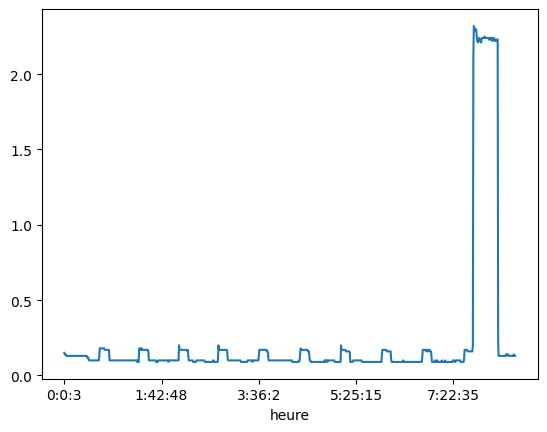

In [96]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()

In [97]:
conso_day['heure']


1103215      0:0:3
1103216     0:0:29
1103217     0:0:54
1103218     0:1:20
1103219     0:1:46
            ...   
1104138    7:58:31
1104139    7:58:57
1104140    7:59:24
1104141    7:59:51
1104142     8:0:18
Name: heure, Length: 928, dtype: object

In [98]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:3',
             days   kWh
  heure                
  0:0:3  11/06/24  0.15),
 ('0:0:29',
              days   kWh
  heure                 
  0:0:29  11/06/24  0.14),
 ('0:0:54',
              days   kWh
  heure                 
  0:0:54  11/06/24  0.14),
 ('0:1:20',
              days   kWh
  heure                 
  0:1:20  11/06/24  0.14),
 ('0:1:46',
              days   kWh
  heure                 
  0:1:46  11/06/24  0.13),
 ('0:2:13',
              days   kWh
  heure                 
  0:2:13  11/06/24  0.13),
 ('0:2:41',
              days   kWh
  heure                 
  0:2:41  11/06/24  0.13),
 ('0:3:8',
             days   kWh
  heure                
  0:3:8  11/06/24  0.13),
 ('0:3:35',
              days   kWh
  heure                 
  0:3:35  11/06/24  0.13),
 ('0:4:2',
             days   kWh
  heure                
  0:4:2  11/06/24  0.13),
 ('0:4:29',
              days   kWh
  heure                 
  0:4:29  11/06/24  0.13),
 ('0:4:56',
              days   

In [99]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:3',
  heure
  0:0:3    0.15
  Name: kWh, dtype: float64),
 ('0:0:29',
  heure
  0:0:29    0.14
  Name: kWh, dtype: float64),
 ('0:0:54',
  heure
  0:0:54    0.14
  Name: kWh, dtype: float64),
 ('0:1:20',
  heure
  0:1:20    0.14
  Name: kWh, dtype: float64),
 ('0:1:46',
  heure
  0:1:46    0.13
  Name: kWh, dtype: float64),
 ('0:2:13',
  heure
  0:2:13    0.13
  Name: kWh, dtype: float64),
 ('0:2:41',
  heure
  0:2:41    0.13
  Name: kWh, dtype: float64),
 ('0:3:8',
  heure
  0:3:8    0.13
  Name: kWh, dtype: float64),
 ('0:3:35',
  heure
  0:3:35    0.13
  Name: kWh, dtype: float64),
 ('0:4:2',
  heure
  0:4:2    0.13
  Name: kWh, dtype: float64),
 ('0:4:29',
  heure
  0:4:29    0.13
  Name: kWh, dtype: float64),
 ('0:4:56',
  heure
  0:4:56    0.13
  Name: kWh, dtype: float64),
 ('0:5:23',
  heure
  0:5:23    0.13
  Name: kWh, dtype: float64),
 ('0:5:49',
  heure
  0:5:49    0.13
  Name: kWh, dtype: float64),
 ('0:6:16',
  heure
  0:6:16    0.13
  Name: kWh, dtype: float64),
 

In [100]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,23564,0.15,23.564,152.775420,25420985572,2024-06-11 00:00:03.407494,11/06/24
0:0:29,25756,0.14,25.756,139.773257,25421011328,2024-06-11 00:00:29.163494,11/06/24
0:0:54,25376,0.14,25.376,141.866330,25421036704,2024-06-11 00:00:54.539494,11/06/24
0:1:20,25488,0.14,25.488,141.242938,25421062192,2024-06-11 00:01:20.027494,11/06/24
0:1:46,26842,0.13,26.842,134.118173,25421089034,2024-06-11 00:01:46.869494,11/06/24
...,...,...,...,...,...,...,...
7:58:31,26770,0.13,26.770,134.478894,25449693417,2024-06-11 07:58:31.252494,11/06/24
7:58:57,26398,0.14,26.398,136.373968,25449719815,2024-06-11 07:58:57.650494,11/06/24
7:59:24,26703,0.13,26.703,134.816313,25449746518,2024-06-11 07:59:24.353494,11/06/24


In [101]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [102]:
df.iloc[0].dates

Timestamp('2024-06-11 00:00:03.407494')

In [103]:
df.dates.dt.time

heure
0:0:3      00:00:03.407494
0:0:29     00:00:29.163494
0:0:54     00:00:54.539494
0:1:20     00:01:20.027494
0:1:46     00:01:46.869494
                ...       
7:58:31    07:58:31.252494
7:58:57    07:58:57.650494
7:59:24    07:59:24.353494
7:59:51    07:59:51.430494
8:0:18     08:00:18.453494
Name: dates, Length: 928, dtype: object

In [104]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [105]:
tranches = len(df)//1000
tranches+1

1

In [106]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-11 00:00:03.407494	2024-06-11 08:00:18.453494	8h 0m 15s 	928


In [107]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('08:01:34', 0.928, 928)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0:0:3 to 8:0:18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   928 non-null    int64         
 1   kWh        928 non-null    float64       
 2   sec        928 non-null    float64       
 3   Wh         928 non-null    float64       
 4   cumul(ms)  928 non-null    int64         
 5   dates      928 non-null    datetime64[ns]
 6   days       928 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 90.3+ KB


In [109]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [110]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 21/08/23 to 11/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     296 non-null    float64
dtypes: float64(1)
memory usage: 4.6+ KB


In [111]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [112]:
df_grp.tail(7)

,kWh
days,
05/06/24,3.522
06/06/24,3.170
07/06/24,2.941
08/06/24,3.367
09/06/24,3.228
10/06/24,3.287
11/06/24,0.928


Text(0.5, 1.0, 'Week conso')

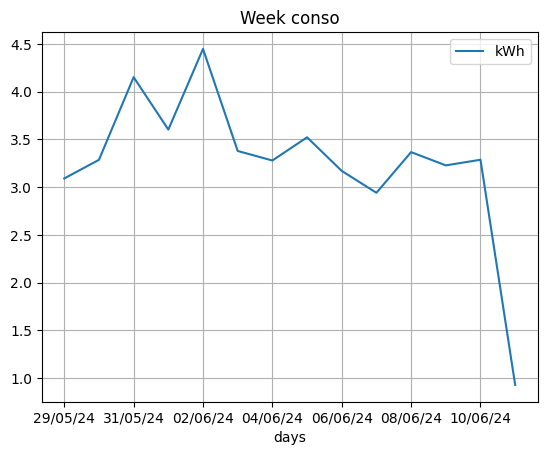

In [113]:
# last week conso
df_grp.tail(14).plot(grid=True)
plt.title('Week conso')

In [114]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [115]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


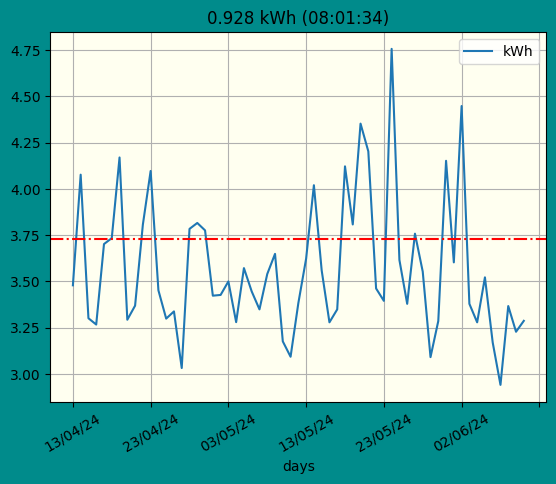

In [116]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [117]:
df_grp.mean()

kWh    3.730213
dtype: float64

In [118]:
#df_grp.head()
df_grp.tail(7)

,kWh
days,
05/06/24,3.522
06/06/24,3.170
07/06/24,2.941
08/06/24,3.367
09/06/24,3.228
10/06/24,3.287
11/06/24,0.928


In [127]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.612433
std,0.437810
min,2.941000
25%,3.302500
50%,3.492000
75%,3.795500
max,4.757000


In [128]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

24/05/24 4.757
07/06/24 2.941


In [121]:
day

'11/06/24'

In [132]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1103215,23564,0.15,23.564,152.775420,25420985572,2024-06-11 00:00:03.407494,11/06/24,0:0:3
1103216,25756,0.14,25.756,139.773257,25421011328,2024-06-11 00:00:29.163494,11/06/24,0:0:29
1103217,25376,0.14,25.376,141.866330,25421036704,2024-06-11 00:00:54.539494,11/06/24,0:0:54
1103218,25488,0.14,25.488,141.242938,25421062192,2024-06-11 00:01:20.027494,11/06/24,0:1:20
1103219,26842,0.13,26.842,134.118173,25421089034,2024-06-11 00:01:46.869494,11/06/24,0:1:46
...,...,...,...,...,...,...,...,...
1104138,26770,0.13,26.770,134.478894,25449693417,2024-06-11 07:58:31.252494,11/06/24,7:58:31
1104139,26398,0.14,26.398,136.373968,25449719815,2024-06-11 07:58:57.650494,11/06/24,7:58:57
1104140,26703,0.13,26.703,134.816313,25449746518,2024-06-11 07:59:24.353494,11/06/24,7:59:24
1104141,27077,0.13,27.077,132.954168,25449773595,2024-06-11 07:59:51.430494,11/06/24,7:59:51


In [120]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 1103215 to 1104142
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   928 non-null    int64         
 1   kWh        928 non-null    float64       
 2   sec        928 non-null    float64       
 3   Wh         928 non-null    float64       
 4   cumul(ms)  928 non-null    int64         
 5   dates      928 non-null    datetime64[ns]
 6   days       928 non-null    object        
 7   heure      928 non-null    object        
 8   hours      928 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 72.5+ KB


In [122]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1103215    00  0.15
  1103216    00  0.14
  1103217    00  0.14
  1103218    00  0.14
  1103219    00  0.13
  ...       ...   ...
  1103332    00  0.10
  1103333    00  0.10
  1103334    00  0.10
  1103335    00  0.10
  1103336    00  0.10
  
  [122 rows x 2 columns]),
 ('01',
          hours  kWh
  1103337    01  0.1
  1103338    01  0.1
  1103339    01  0.1
  1103340    01  0.1
  1103341    01  0.1
  ...       ...  ...
  1103439    01  0.1
  1103440    01  0.1
  1103441    01  0.1
  1103442    01  0.1
  1103443    01  0.1
  
  [107 rows x 2 columns]),
 ('02',
          hours  kWh
  1103444    02  0.1
  1103445    02  0.1
  1103446    02  0.1
  1103447    02  0.1
  1103448    02  0.1
  ...       ...  ...
  1103552    02  0.1
  1103553    02  0.1
  1103554    02  0.1
  1103555    02  0.1
  1103556    02  0.1
  
  [113 rows x 2 columns]),
 ('03',
          hours  kWh
  1103557    03  0.1
  1103558    03  0.1
  1103559    03  0.1
  1103560    03  0.1
  110

In [123]:
groupedbyhour.count()

,kWh
hours,
00,122
01,107
02,113
03,106
04,104
05,106
06,107
07,162
08,1


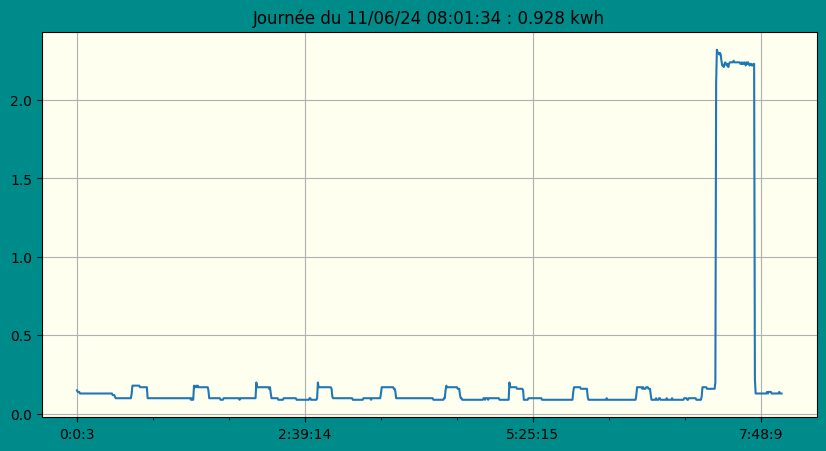

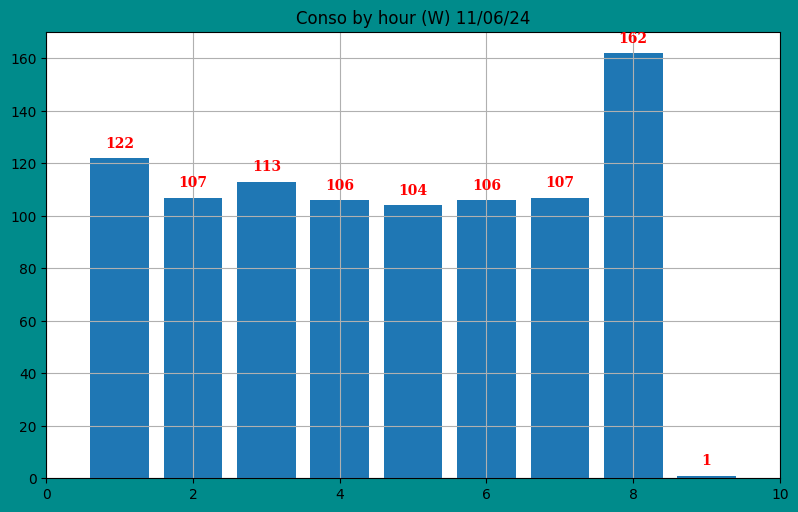

In [124]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [125]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

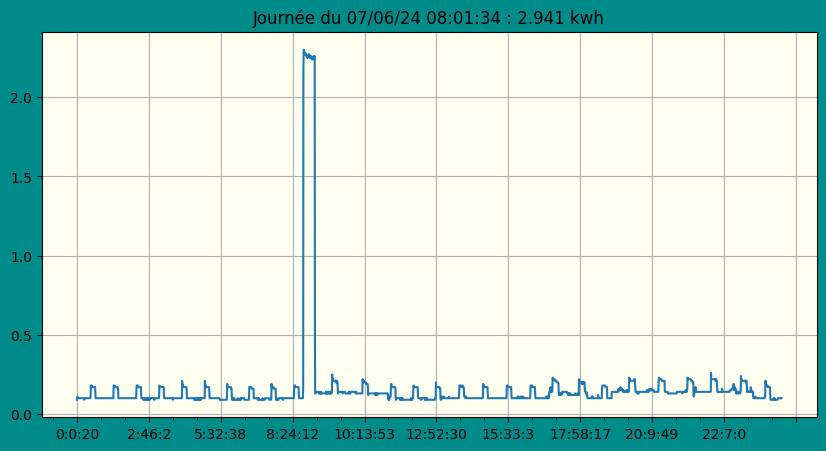

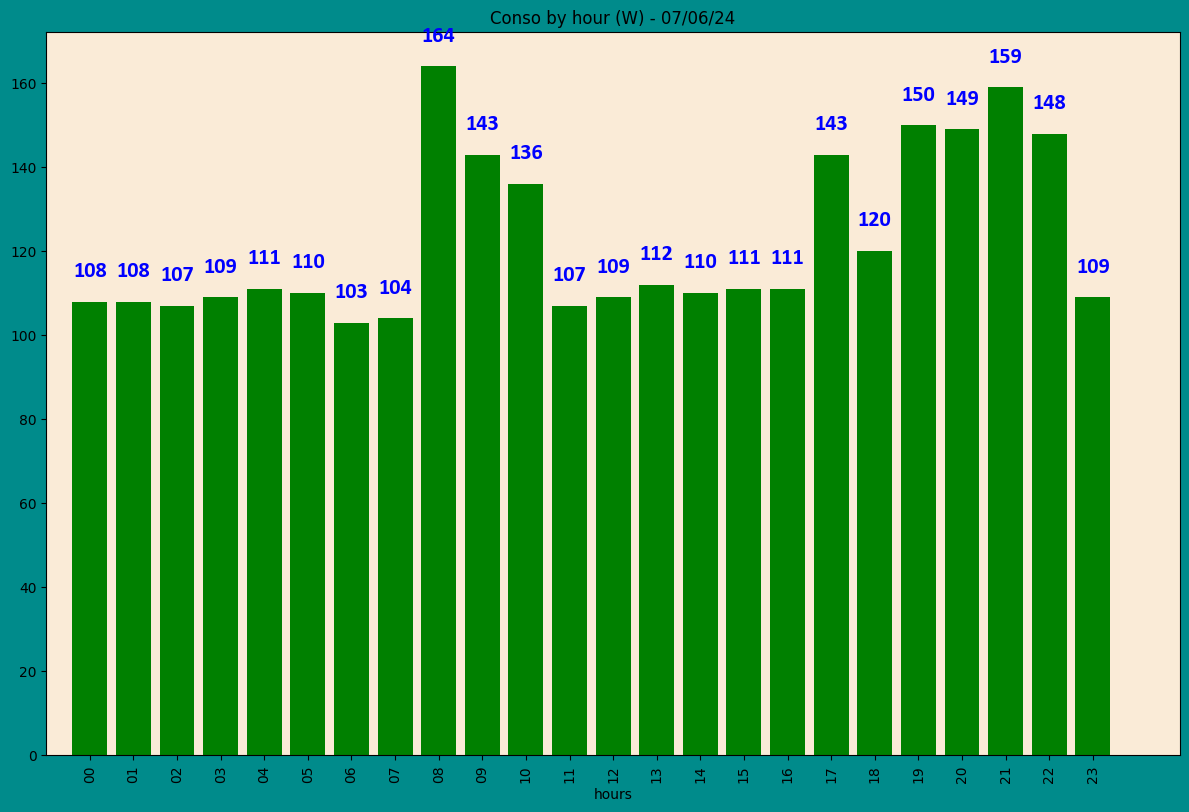

In [126]:
# plot any day
day = '07/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)